# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>


Trabalho realizado por:
* Roman Ishchuk, numero <b> 43498 </b>
* Diogo Santos, numero <b> 48626 </b>
* Pedro Silva, numero <b> 48965 </b>


<b> Turma 33D - Michele Mengucci </b>
 


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

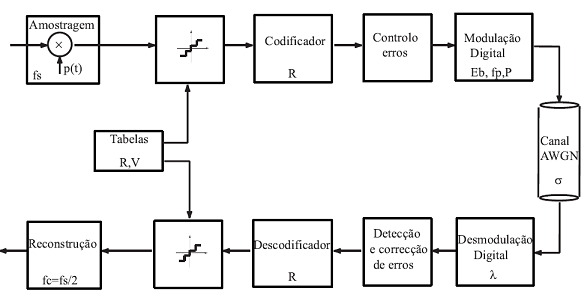

O 1º trabalho foca os blocos Quantificação/ Desquantificação do sinal e Códigos Detectores e Correctores de Erros. 

Além disso inclui uma revisão teórica da Amostragem e Reconstrução.




In [1]:
#Import
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import IPython.display as ipd 
from PIL import Image
import cv2

# A. Amostragem

1. Considere o sinal $x(t) = 20000 cos(2\pi 5025 t) + 10000 sin(2\pi 2507 t)$. Estude o sinal teoricamente. Apresente a expressão do espetro do sinal e represente numa figura o espectro de Amplitude e de Fase do sinal.


Fórmula de Euler:

$ cis\theta = e^{j\theta} = cos\theta + jsin\theta $


Cálculos teóricos:

$ x(t) = 20000cos(2\pi5025t) + 10000sin(2\pi2507t) $

Em primeiro lugar, vamos passar o sin para cos:

$ x(t) = 20000cos(2\pi5025t) + 10000cos(2\pi2507t - \frac{\pi}{2}) $

Vamos aplicar a formuma de Euler no sinal:

Nota: a primeira sinusoide não tem fase, mas a segunda sim. Tem este aspeto: $ e^{-j\frac{\pi}{2}} $

$ x(t) = 10000e^{j2\pi5025t} + 10000e^{-j2\pi5025t} + 5000e^{-j\frac{\pi}{2}}e^{j2\pi2507t} + 5000e^{j\frac{\pi}{2}}e^{-j2\pi2507t}$

Agora podemos extrair o espetro do sinal com este aspeto: $ \{(\frac{A}{2}, f); ...\} $


$ \{ (10000, 5025); (10000, -5025); (5000 e^{-j \frac{\pi}{2}}, 2507); (5000 e^{j \frac{\pi}{2}}, -2507) \} $


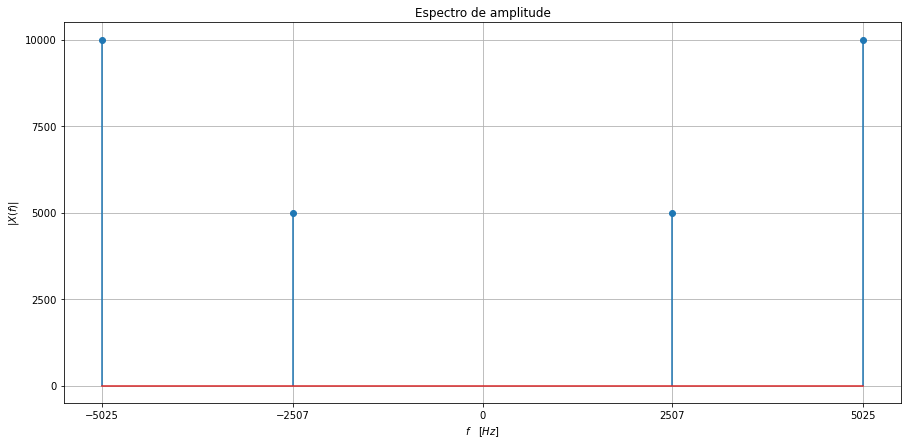

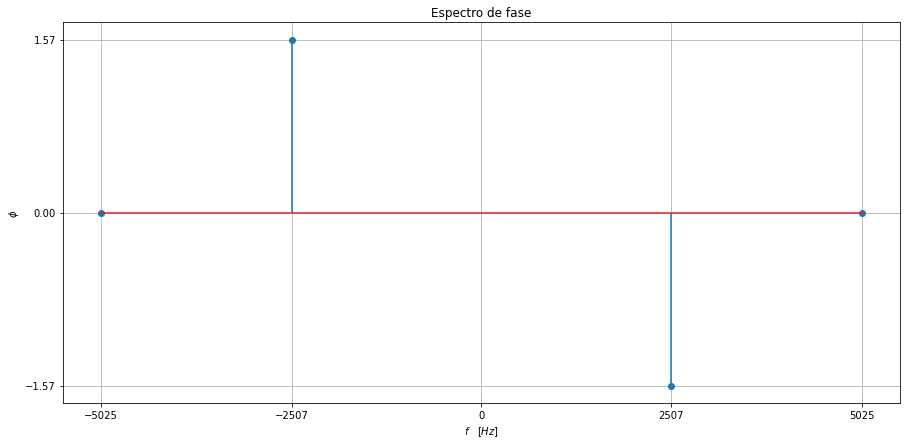

In [2]:
#Ordenação das freqências e fases de acordo com o espetro do sinal
freq = [-5025, -2507, 2507, 5025]
amp = [10000, 5000, 5000, 10000]
fase = [0, np.pi/2, -np.pi/2, 0]

#Espetro de amplitude
plt.figure(figsize=(15,7)) 
plt.xticks([-5025, -2507, 0, 2507, 5025])
plt.yticks(np.arange(0, 10001, 2500))
plt.title("Espectro de amplitude")
plt.xlabel("$f \quad [Hz]$")
plt.ylabel("$|X(f)|$")
plt.stem(freq,amp)
plt.grid()

#Espetro de fase
plt.figure(figsize=(15,7)) 
plt.xticks([-5025, -2507, 0, 2507, 5025])
plt.yticks(np.arange(-2*np.pi, 2*np.pi, np.pi/2))
plt.title("Espectro de fase")
plt.xlabel("$f \quad [Hz]$")
plt.ylabel("$\phi$")
plt.stem(freq,fase)
plt.grid()
plt.show()

2. Gere o sinal $x(t)$ usando o Python. Cnsidere o intervalo de tempo $0 < t < 1\,ms$, e a frequência de amostragem de 48KHz. Apresente numa figura o sinal no domínio do tempo e noutra figura o seu espetro de amplitude.


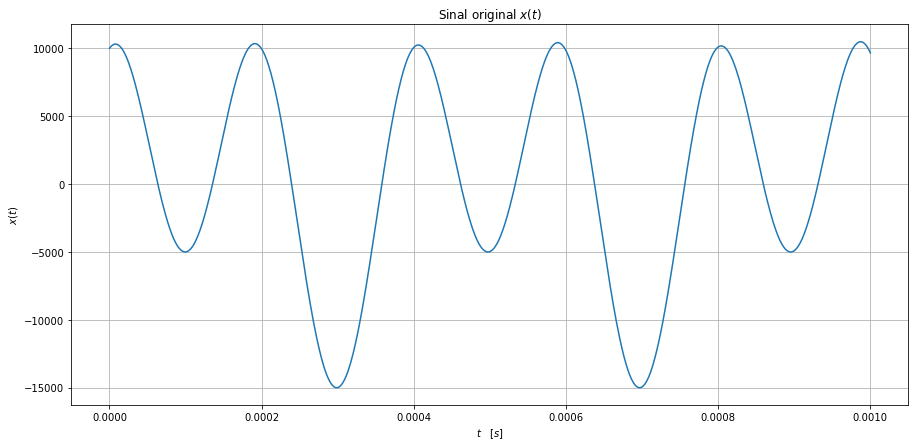

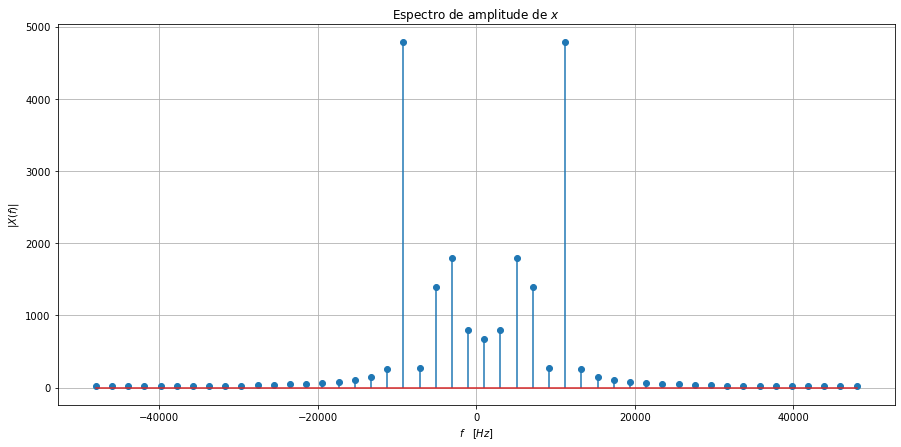

In [3]:
#Intervalo de tempo
t = np.arange(0,0.001,0.000001)

#Sinal 
A1 = 10000
A2 = 5000
f1 = 5025
f2 = 2507

x = A1*np.cos(2*np.pi*f1*t) + A2*np.cos(2*np.pi*f2*t -np.pi/2)

#plot
plt.figure(figsize=(15,7)) 
plt.title("Sinal original $x(t)$")
plt.xlabel("$t \quad [s]$")
plt.ylabel("$x(t)$")
plt.plot(t,x)
plt.grid()
plt.show()


#Freqência de amostragem em Hz
Fs = 48000
Ts = 1/Fs

#Intervalo de tempo
t = np.arange(0,0.001,Ts)

x = A1*np.cos(2*np.pi*f1*t) + A2*np.cos(2*np.pi*f2*t -np.pi/2)

#Intervalo de freqências
f = np.linspace(-Fs, Fs, len(x))

#FFT
X = np.fft.fft(x)
Xshifted = np.fft.fftshift(X)/len(x) #normalizado sobre o numero de pontos
Xamp = np.abs(Xshifted)

#stem
plt.figure(figsize=(15,7)) 
plt.title("Espectro de amplitude de $x$")
plt.xlabel("$f \quad [Hz]$")
plt.ylabel("$|X(f)|$")
plt.stem(f,Xamp)
plt.grid()
plt.show()

3. Admitindo que faz a amostragem do sinal com uma frequência $f_s = 8kHz$, represente o espectro do sinal amostrado. Comente os resultados apresentados.

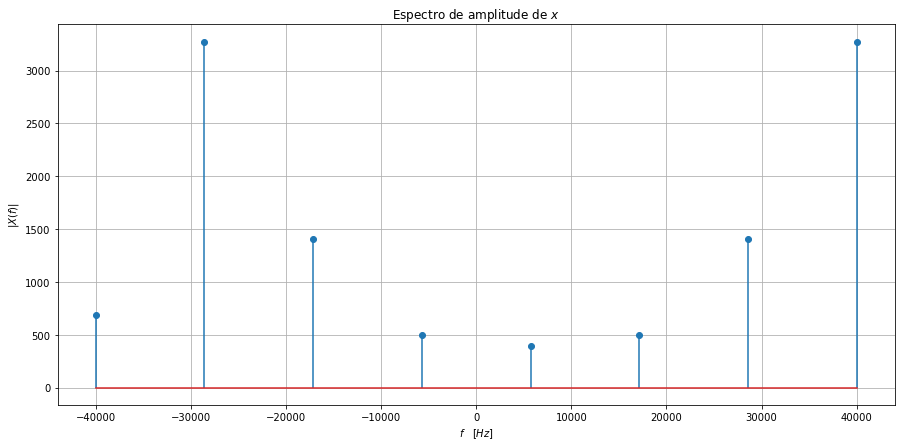

In [4]:
#Sinal 
A1 = 10000
A2 = 5000
f1 = 5025
f2 = 2507

#Freqência de amostragem em Hz
Fs = 8000
Ts = 1/Fs

#Intervalo de tempo
t = np.arange(0,0.001,Ts)

x = A1*np.cos(2*np.pi*f1*t) + A2*np.cos(2*np.pi*f2*t -np.pi/2)


#Intervalo de freqências
f = np.linspace(-5*Fs, 5*Fs, len(x))

#FFT
X = np.fft.fft(x)
Xshifted = np.fft.fftshift(X)/len(x) #normalizado sobre o numero de pontos
Xamp = np.abs(Xshifted)

#stem
plt.figure(figsize=(15,7)) 
plt.title("Espectro de amplitude de $x$")
plt.xlabel("$f \quad [Hz]$")
plt.ylabel("$|X(f)|$")
plt.stem(f,Xamp)
plt.grid()
plt.show()

A amostragem com $ Fs = 48 \ [kHz] $ foi bem succedida. Ao diminuirmos a freqência de amostragem, começamos a desrespeitar a regra de Nyquist. Ou seja, Fs > 2*fmax. Como isto não acontece, estamos a reconstruir mal o sinal, acontecendo um efeito chamado Aliasing. Para o sinal ser bem reconstruido, a frequência de amostragem tem que ser, pelo menos $ 2*5025 = 10050 \ [Hz]$. Conseguimos ver as duas reconstruções no domínio do tempo em baixo.

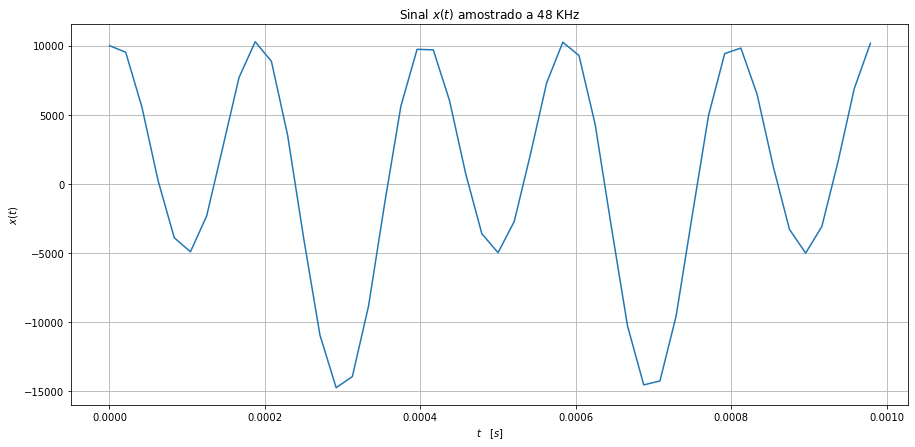

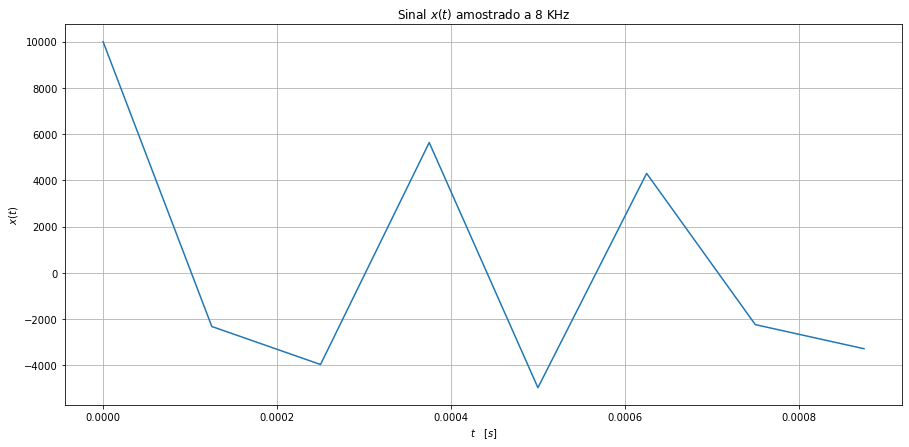

In [5]:
#Sinal 
A1 = 10000
A2 = 5000
f1 = 5025
f2 = 2507

#Freqência de amostragem em Hz
Fs1 = 48000
Ts1 = 1/Fs1

#intervalo de tempo
t1 = np.arange(0,0.001,Ts1)

x1 = A1*np.cos(2*np.pi*f1*t1) + A2*np.cos(2*np.pi*f2*t1 -np.pi/2)

#plot
plt.figure(figsize=(15,7)) 
plt.title("Sinal $x(t)$ amostrado a 48 KHz")
plt.xlabel("$t \quad [s]$")
plt.ylabel("$x(t)$")
plt.plot(t1, x1)
plt.grid()
plt.show()

#Freqência de amostragem em Hz
Fs2 = 8000
Ts2 = 1/Fs2

#intervalo de tempo
t2 = np.arange(0,0.001,Ts2)

x2 = A1*np.cos(2*np.pi*f1*t2) + A2*np.cos(2*np.pi*f2*t2 -np.pi/2)

#plot
plt.figure(figsize=(15,7)) 
plt.title("Sinal $x(t)$ amostrado a 8 KHz")
plt.xlabel("$t \quad [s]$")
plt.ylabel("$x(t)$")
plt.plot(t2, x2)
plt.grid()
plt.show()

# B. Quantificação

4. Construa uma função em Python que crie as tabelas com os valores de decisão e valores de quantificação para um quantificador uniforme. 

    Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída deve devolver dois Numpy arrays com valores de quantificação e os valores de decisão.

In [6]:
def Quantific(R,Vmax,Qtype):

    GamaDinamica = Vmax*2
    L = 2**R
    delta = (GamaDinamica)/L
    
    if (Qtype =='midrise'):
        Vq = np.arange(-Vmax + delta/2, Vmax, delta)
        Dq = np.arange(-Vmax  + delta, Vmax, delta)
        
    if (Qtype == "midtread"):
        Vq = np.arange(-Vmax, Vmax - delta/2, delta)
        Dq = np.arange(-Vmax + delta/2, Vmax-delta/2, delta)
        
    return Vq, Dq

## Verifique se a sua implementação
Realize um conjunto de testes unitários. Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.
* use uma lista de valores (poucos para conseguir validar manualmente)
* use uma arange entre -Vmax e Vmax

In [7]:
#testes
Vq, Dq = Quantific(3,1,'midtread')
print('midtread com R=3 e Vmax=1')
print('Vq:' , Vq)
print('Dq:' , Dq)

print()

Vq, Dq = Quantific(3,1,'midrise')
print('midrise com R=3 e Vmax=1')
print('Vq:' , Vq)
print('Dq:' , Dq)


midtread com R=3 e Vmax=1
Vq: [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
Dq: [-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625]

midrise com R=3 e Vmax=1
Vq: [-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
Dq: [-0.75 -0.5  -0.25  0.    0.25  0.5   0.75]


Conseguimos ver que os quantificadores, seja midthread, seja midrise, criam tabelas esperadas. Temos $R = 3$, e temos $ 2^{3} $ valores de decisão. E todos os valores estão contidos entre $-Vmax \ e \  Vmax$.

## Implemente o quantificador

Implemente uma função que realize a quantificação


In [8]:
# Função que implementa o Quantificador
# in: 
# x - sinal com amostras (nao quantificadas)
# Vq, Dq - valores de quantificação e valores de decisão
# out: 
# xq - sinal quantificado
# iq - indices do sinal quantificado
# prototipo da função
# xq, iq = Quantificador(x, Vq, Dq)
def Quantificador(x, Vq, Dq):
    xq = x
    iq = np.zeros(len(x), dtype=int)
    
    for i in range(len(Dq)):
        if i == 0:
            I = x <= Dq[i] 
        else:
            I = (x > Dq[i-1]) & (x <= Dq[i])
         
        xq = np.where(I == True, Vq[i], xq)

        iq = np.where(I == True, i, iq)
   
    iq = np.where(xq > Dq[len(Dq) - 1], len(Vq)-1, iq)
    xq = np.where(xq > Dq[len(Dq) - 1], Vq[len(Vq) - 1], xq)
      
    return xq, iq

Quantificador midrise com R=3 e Vmax=4
Vq: [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
Dq: [-3. -2. -1.  0.  1.  2.  3.]
xq: [-3.5 -3.5 -3.5 ...  3.5  3.5  3.5]
iq: [0 0 0 ... 7 7 7]
Quantificador midtread com R=3 e Vmax=4
Vq: [-4. -3. -2. -1.  0.  1.  2.  3.]
Dq: [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5]
xq: [-4. -4. -4. ...  3.  3.  3.]
iq: [0 0 0 ... 7 7 7]


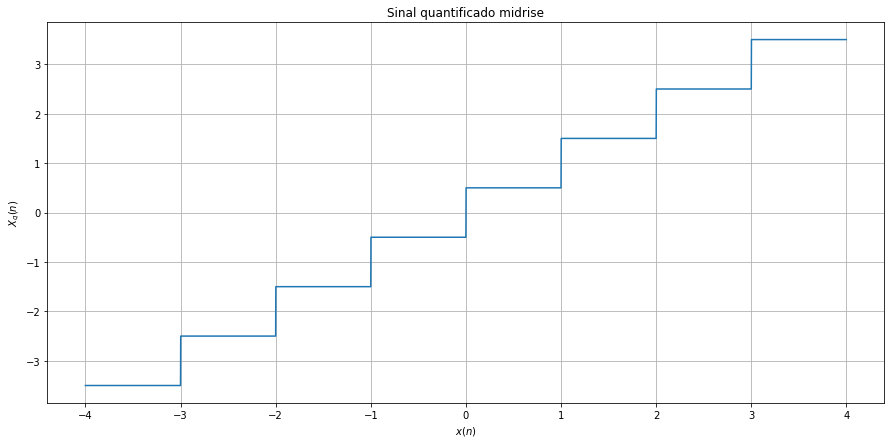

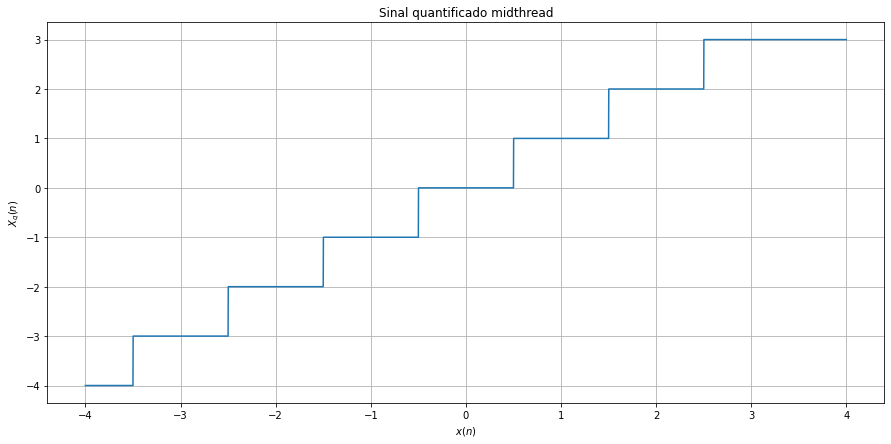

In [9]:
#Testes ao midrise
print('Quantificador midrise com R=3 e Vmax=4')
Vq, Dq = Quantific(3,4,'midrise')
print('Vq:',Vq)
print('Dq:',Dq)
x = np.arange(-4,4,0.001)
xq, iq = Quantificador(x, Vq, Dq)
print('xq:',xq)
print('iq:',iq)

#plot midrise
plt.figure(figsize=(15,7)) 
plt.title("Sinal quantificado midrise")
plt.xlabel("$x(n)$")
plt.ylabel("$X_q(n)$")
plt.plot(x, xq)
plt.grid()

#testes ao midtread
print('Quantificador midtread com R=3 e Vmax=4')
Vq, Dq = Quantific(3,4,'midtread')
print('Vq:',Vq)
print('Dq:',Dq)
x = np.arange(-4,4,0.001)
xq, iq = Quantificador(x, Vq, Dq)
print('xq:',xq)
print('iq:',iq)

#plot midtread
plt.figure(figsize=(15,7)) 
plt.title("Sinal quantificado midthread")
plt.xlabel("$x(n)$")
plt.ylabel("$X_q(n)$")
plt.plot(x, xq)
plt.grid()

## Use uma função sinusoidal e represente o sinal original, quantificado e o sinal de erro

y:  [ 4.          3.74892927  3.02723533  1.92551629  0.58207686 -0.8344338
 -2.14619351 -3.18853003 -3.83059326 -3.99178157 -3.65186012 -2.85350106
 -1.69692671 -0.32732804  1.08336187  2.35805156  3.33672238  3.89651653]
Vq:  [-3. -1.  1.  3.]
Dq:  [-2.  0.  2.]
xq:  [ 3.  3.  3.  1.  1. -1. -3. -3. -3. -3. -3. -3. -1. -1.  1.  3.  3.  3.]
iq: [3 3 3 2 2 1 0 0 0 0 0 0 1 1 2 3 3 3]
Serro:  [ 1.          0.74892927  0.02723533  0.92551629 -0.41792314  0.1655662
  0.85380649 -0.18853003 -0.83059326 -0.99178157 -0.65186012  0.14649894
 -0.69692671  0.67267196  0.08336187 -0.64194844  0.33672238  0.89651653]


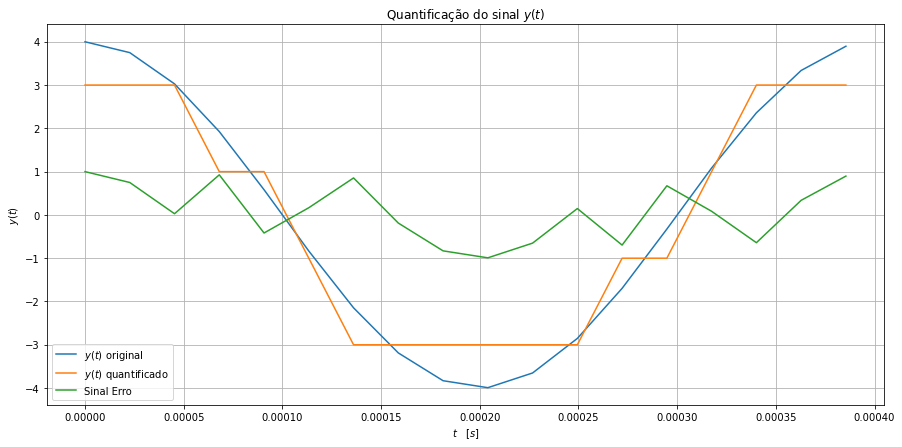

In [10]:
#Frequencia de amostragem
Fs = 44100
#Freqência do sinal
f = 2500
#Periodo
T0 = 1/f

#intervalo de tempo
t = np.arange(0,T0, 1/Fs)

#função y
y = 4*np.cos(2*np.pi*f*t)

print("y: ", y)

#plot
plt.figure(figsize=(15,7))
plt.title("Quantificação do sinal $y(t)$")
plt.xlabel("$t \quad [s]$")
plt.ylabel("$y(t)$")
plt.plot(t,y, label = "$y(t)$ original")


#Quantificação
Vq, Dq = Quantific(2,4,'midrise')
print("Vq: " , Vq)
print("Dq: " , Dq)
xq, iq = Quantificador(y, Vq, Dq)
print("xq: " , xq)
print("iq:" , iq)

#plot

plt.plot(t,xq,label = "$y(t)$ quantificado")

#Cálculo do erro e plot
Serro = y - xq
print("Serro: ", Serro)
plt.plot(t,Serro, label = "Sinal Erro")
plt.grid()
plt.legend()

Represente o histograma do sinal de erro. Comente os resultados.

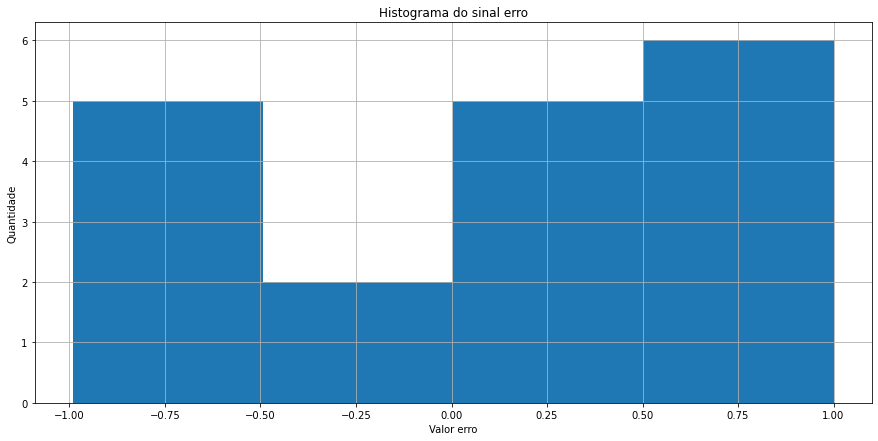

In [11]:
plt.figure(figsize=(15,7)) 
plt.title("Histograma do sinal erro")
plt.xlabel("Valor erro")
plt.ylabel("Quantidade")
plt.hist(Serro, 4)
plt.grid()

Conseguimos ver que existe sempre erro na quantificação, em relação ao sinal original. Isto vai acontecer sempre, pois o valor de quantificação pode ser bastante distante do valor real quantificado. Podemos diminuir o erro, aumentando o número de bits e diminuindo o Vmax (desde que abranja o sinal todo).

## SNR

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.


In [12]:
def Measure_SNRp(x,xq):
    
    #cálculo da potência do sinal
    E = np.sum(np.square(x))
    P = E/len(x)
    
    e = xq - x
    
    #cálculo da potência do sinal erro
    Ee = np.sum(np.square(e))
    Pe = Ee/len(e)
    
    #em dB
    SNRp = 10*np.log10(P/Pe)
    
    #E = np.sum(sinal amostrado ao quadrado)
    #P = E/N --> N é o tempo
        
    return SNRp

In [13]:
#Testes
R = 2
Vmax = 4
Vq, Dq = Quantific(R,Vmax,'midrise')

f = 1000
T0 = 1/f
Fs = 44100
t = np.arange(0,10*T0, 1/Fs)
x = 3*np.cos(f*np.pi*t)

xq, iq = Quantificador(x, Vq, Dq)

SNRp = Measure_SNRp(x,xq)
print('SNR prático:',SNRp)

SNR prático: 12.223060739212192


Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [14]:
def Measure_SNRt(x,R,Vmax):
    
    #cálculo da potência do sinal
    E = np.sum(np.square(x))
    P = E/len(x)

    #em dB
    SNRtdb = 6.02 * R + 10*np.log10((3*P)/Vmax**2)

    return SNRtdb

In [15]:
#Testes
R = 2
Vmax = 4
Vq, Dq = Quantific(R,Vmax,'midrise')

f = 1000
T0 = 1/f
Fs = 44100
t = np.arange(0,10*T0, 1/Fs)
x = 3*np.cos(f*np.pi*t)

xq, iq = Quantificador(x, Vq, Dq)

SNRt = Measure_SNRt(x,R,Vmax)
print('SNR teórico:',SNRt)

SNR teórico: 11.302137858390811


## Testes
Considere o sinal de rampa já implementado.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

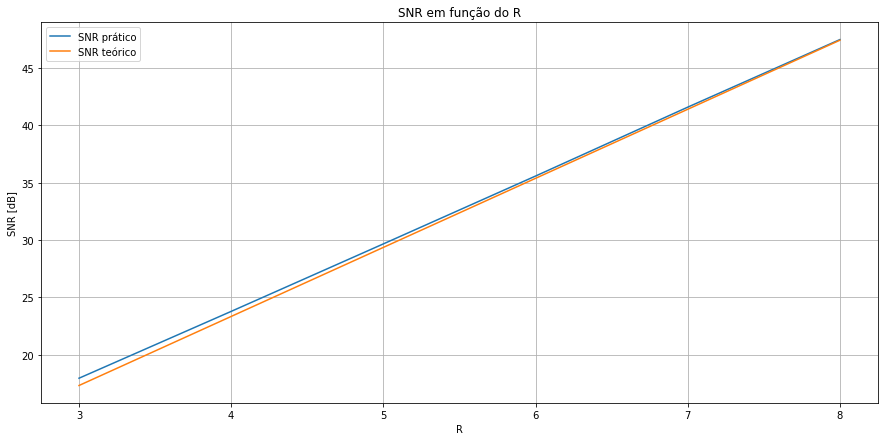

In [16]:
#Vários valores para R
R=[3,4,5,6,7,8]
#Vmax
Vmax = 4

SNRT=[]
SNRP=[]


#Frequência de amostragem
Fs = 44100
#Periodo
T0 = 1/f
#Intervalo de tempo
t = np.arange(0,10*T0, 1/Fs)
#sinal
f = 2000
x = 3*np.cos(f*np.pi*t)

for i in R: 
    Vq, Dq = Quantific(i,Vmax,'midtread')
    xq,iq = Quantificador(x,Vq,Dq)
    SNRp = Measure_SNRp(x,xq)
    SNRt = Measure_SNRt(x,i,Vmax)
    SNRP.append(SNRp)
    SNRT.append(SNRt)

#plots
plt.figure(figsize=(15,7)) 
plt.plot(R, SNRP, label = 'SNR prático')    
plt.plot(R, SNRT,label = 'SNR teórico')
plt.title("SNR em função do R")
plt.xlabel("R")
plt.ylabel("SNR [dB]")
plt.grid()
plt.legend()

Ao observarmos o gráfico, podemos concluir que, o SNR prático e o SNR teórico são bastante parecidos. Averiguamos também, que o SNR aumenta em função do R.
Nota: No enunciado diz "Considere o sinal de rampa já implementado." ?????
Qual rampa?

## Testes com voz
Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a quantifição do sinal para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados

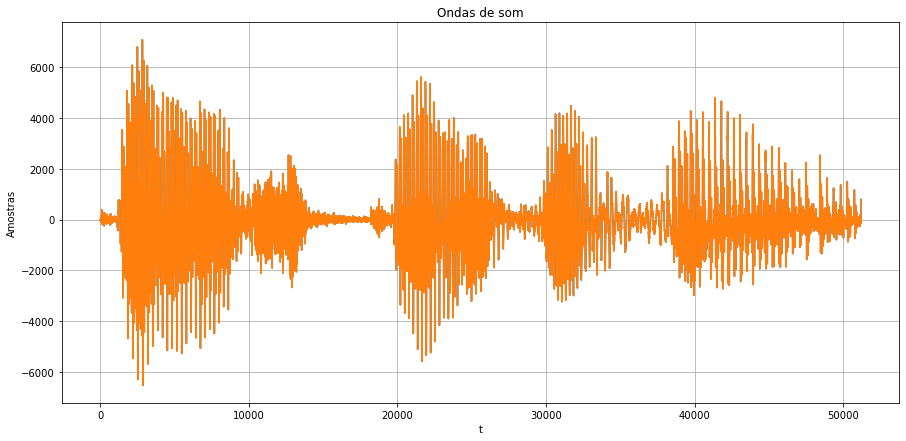

In [17]:
fs, data = wav.read("teste_voz_1s.wav")
plt.figure(figsize=(15,7)) 
plt.plot(data)
plt.title("Ondas de som")
plt.xlabel("t")
plt.ylabel("Amostras")
plt.grid()

ipd.Audio('teste_voz_1s.wav')

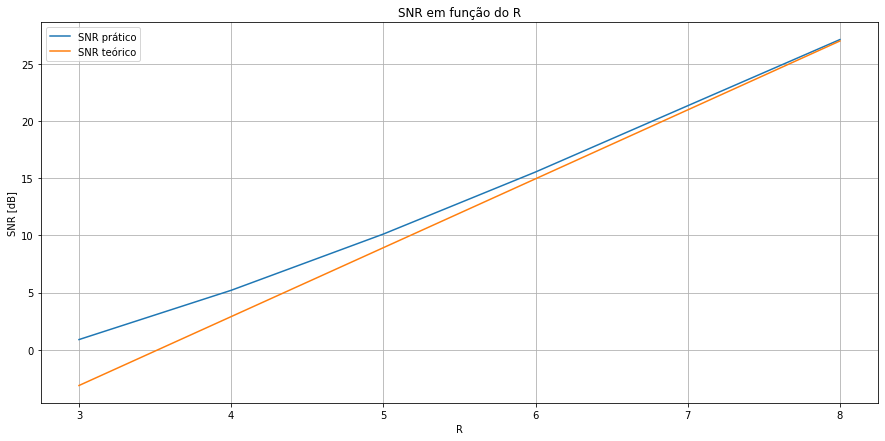

In [18]:
data = np.array(data[:,0],'int16')
#normalizamos o sinal
sinal_normal = data/max(data)

#Vários valores para R
R=[3,4,5,6,7,8]
SNRT=[]
SNRP=[]

#max
Vmax = 4

for i in R: 
    Vq, Dq = Quantific(i,Vmax,'midtread')
    xq,iq = Quantificador(sinal_normal,Vq,Dq)
    SNRp = Measure_SNRp(sinal_normal,xq)
    SNRt = Measure_SNRt(sinal_normal,i,Vmax)
    SNRP.append(SNRp)
    SNRT.append(SNRt)

#plots
plt.figure(figsize=(15,7)) 
plt.plot(R, SNRP, label = 'SNR prático')    
plt.plot(R, SNRT, label = 'SNR teórico')
plt.title("SNR em função do R")
plt.xlabel("R")
plt.ylabel("SNR [dB]")
plt.grid()
plt.legend()

Ao observarmos o gráfico, podemos concluir que, o SNR prático e o SNR teórico são bastante parecidos. Averiguamos também, que o SNR aumenta em função do R.

## Imagem
Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

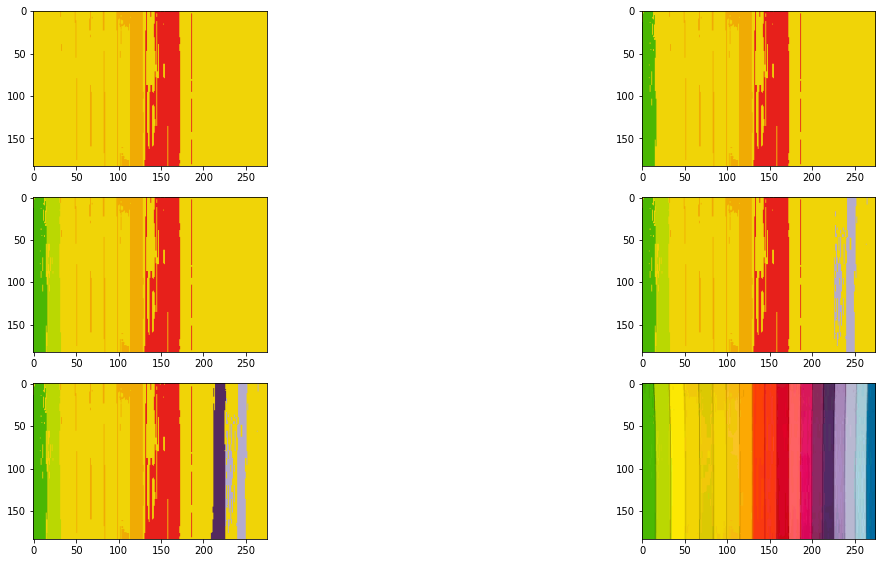

In [19]:
#fig, (ax1, ax2) = plt.subplots(2, figsize = (10, 10))
plt.figure(figsize = (20,20))

Q = [0,3,4,5,6,7,255]
im = Image.open("rainbow.tiff")

#type(im)

for i in range(1,len(Q)):
    plt.subplot(6,2,i)
    
    imq = im.quantize(Q[i])
#im.show()
    plt.imshow(imq,cmap='gray')
#print(type(imq))
    imagem = np.asarray(imq)
#print(imagem.shape)
#imagem[:,:]

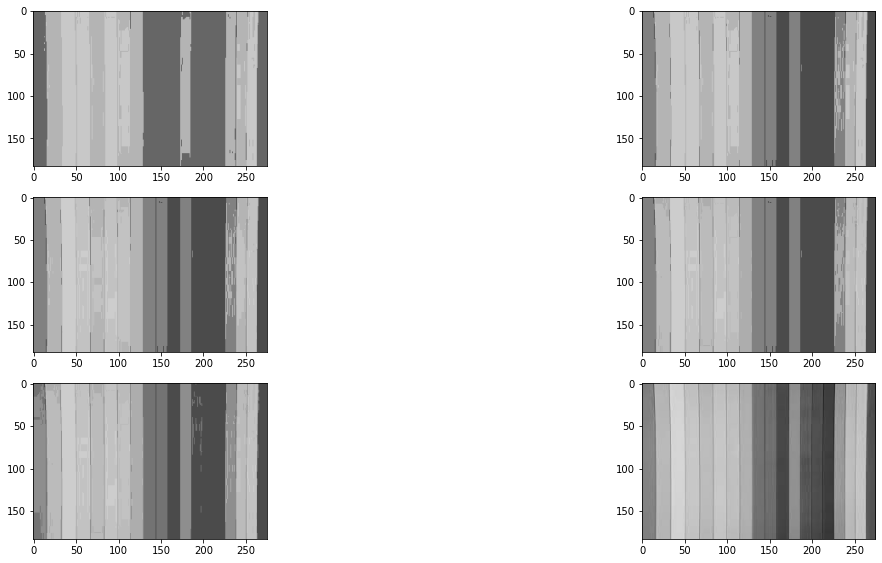

In [20]:
plt.figure(figsize = (20,20))
for n in range(1,len(Q)):
    image = cv2.imread("rainbow.tiff")
    image

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray
    cv2.imwrite("rainbow_gray.tiff", gray)

    plt.subplot(6,2,n)
    im2 = Image.open("rainbow_gray.tiff")
    imq2 = im2.quantize(Q[n])
    plt.imshow(imq2,cmap='gray')

Nas duas células anteriores, estamos a quantificar uma imagem 6 vezes, com diferentes valores de Q. Em primeiro, está antes do grey scale, em segundo lugar, está depois do gray scale. As imagens estão por ordem, de esquerda para a direita, e de cima para baixo.

# C. Codificação/ Descodificação

Construa uma função Python que dado um Numpy array (com dimensão  𝑁 ) com valores inteiros, retorne um Numpy array (com dimensão  𝑁.𝑅×1 ) com os mesmos valores convertidos para binário. Esta função ainda deve receber como parâmetros de entrada o número de bits ( 𝑅 ) a usar na conversão de cada inteiro.

In [21]:
def Codific(array, R):
    
    #converter o array recebido em inteiros
    array_int = np.array(array, dtype = int)
    array_binary = []
    
    
    for i in array_int:
        #slice dos primeiros 2 caracteres 0b e conversão para binário
        array_binary.append( bin(i)[2:].zfill(R))
    #juntamos todos os binários numa lista
    a = list(np.array(["".join(array_binary)])[0])
    
    #passamos de String para int
    return list(map(int, a))

Construa uma função que dado um Numpy array com valores os bits, faça a conversão para inteiros (considerando R bits).

In [22]:
def Descodific(arr_binary,R):
    array_bin = []  
    array_int = []
    
    #inicio do número em binário
    i=0;    
    #fim do número em binário
    f = R     
    
    for n in range(int(len(arr_binary)/R)):  
        #vamos buscar do array binário R número de bits
        array_bin_to_int = arr_binary[i:f]    
        #juntamos os bits com ""
        array_bin_to_int = "".join(map(str,array_bin_to_int))                  
        array_bin.append(array_bin_to_int)   
        #incrementemos a posição do próximo número em binário
        i=i+R                 
        f = f + R
        #convertemos bin base 2 para int
        array_int.append(int(array_bin[n],2))        
    return np.array(array_int)

In [23]:
#Testes
arr = np.array([1,2,3,4,5,6,7,8,9,10])          
code = Codific(arr,4)          
decode = Descodific(code,4)          
print("array:")     
print(arr)     
print("array codificado:")     
print(code)     
print("array descodificado:")     
print(decode)

array:
[ 1  2  3  4  5  6  7  8  9 10]
array codificado:
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0]
array descodificado:
[ 1  2  3  4  5  6  7  8  9 10]


<b> Conclusões </b>

O codificador e descodificador foram implementados, para isso usámos funções como o map, slice, join, zfill e bin. No exemplo podemos observar um array com números de 1 a 10 que quando codificado a 4 bits exibe os números do array original em binário e quando descodificado volta ao normal.



Com base nas funções já implementadas, faça a codificação e descodificação PCM uniforme do sinal de áudio previamente gravado. Verifique qual a SNR obtida e ouça o sinal descodificado. Use para o efeito R=3, 5 e 8.

In [24]:
def dequantificador(valor,val_quant):          
    x = np.zeros(len(valor))               
    for i in range(len(valor)):                  
        x[i]=val_quant[valor[i]]             
    return np.array(x)

#sinal
Fs, samples = wav.read("teste_voz_1s.wav")

samples = np.array(samples[:,0],'int16')
#sinal normalizado
sinal_normal = samples/max(samples)

#array de R
R=[3,5,8]
audio_quantified = [0, 0, 0]
audio_cod = [0, 0, 0]
audio_desc = [0, 0, 0]

Vmax = 1
for i in range(len(R)):
    #Quantificação
    Vq, Dq = Quantific(R[i],Vmax,'midtread')
    audio_quantified[i] = Quantificador(sinal_normal,Vq,Dq)
    #Codificação
    audio_cod[i] = Codific(audio_quantified[i][1],R[i])
    #Descodificação
    audio_desc[i] = Descodific(audio_cod[i],R[i])
    
    array_dequant = dequantificador(audio_desc[i],Vq)          
    array_desnormal = array_dequant * max(samples)
    
    #Passamos tudo para float
    audio_quantified[i] = np.array(audio_desc[i], dtype=np.float32)
    audio_cod[i] = np.array(audio_desc[i], dtype=np.float32)
    audio_desc[i] = np.array(audio_desc[i], dtype=np.float32)
    #Escrita do ficheiro
    out_f = "som" + str(i) + ".wav"
    wav.write(out_f, Fs, array_desnormal.astype("int16"))

In [25]:
#Audio Original
ipd.Audio('teste_voz_1s.wav')

In [26]:
#R = 3
ipd.Audio('som0.wav')

In [27]:
#R = 5
ipd.Audio('som1.wav')

In [28]:
#R = 8
ipd.Audio('som2.wav')

<b> Conclusões </b>

Neste exercício realizamos a respectiva codificação e descodificação uniforme do sinal de áudio &quot;teste_voz_1s.wav&quot; para os diferentes tipos de R. Para isso tivemos que criar um método extra para a desquantificação. Segue-se asseguir ao código o som usado, e os sons produzidos para os diferentes Rs , em que podemos concluir que quanto maior é o R , menor é o ruido.

# D.  Deteção e Correção de erros 

Deteção e Correção de erros
Construa uma função que implemente o Hamming(7,4). Utilize a seguinte matriz geradora:

In [29]:
#matriz geradora slide 27
G=np.array([[1,0,0,0,0,1,1],[0,1,0,0,1,1,0],[0,0,1,0,1,0,1],[0,0,0,1,1,1,1]])
print(G)

[[1 0 0 0 0 1 1]
 [0 1 0 0 1 1 0]
 [0 0 1 0 1 0 1]
 [0 0 0 1 1 1 1]]


In [30]:
def Hamming_7_4(arr_bits):
    #criamos um array de 0 com dimensao 7
    arr_binary = np.zeros((7,), dtype=int)
    
    #fazemos o xor de cada coluna com o array recebido
    for bit in range(len(arr_binary)):
        arr_binary[bit] = (arr_bits[0] & G[0][bit]) ^ (arr_bits[1] & G[1][bit]) ^ (arr_bits[2] & G[2][bit]) ^ (arr_bits[3] & G[3][bit])
    
    return arr_binary

In [31]:
# testes
msg = [0, 0, 1, 0]
c = Hamming_7_4(msg)
print("Palavra de código obtida após Hamming(7,4): " + str(c))

Palavra de código obtida após Hamming(7,4): [0 0 1 0 1 0 1]


Construa uma função que dado um Numpy array M bits, para cada 7 bits detecte e corriga possíveis erros, sendo o resultado 4 bits de mensagem.

In [32]:
#matriz Ht
Ht=np.array([[0,1,1],[1,1,0],[1,0,1],[1,1,1],[1,0,0],[0,1,0],[0,0,1]]) #slide 27
print(Ht)
print()
#matriz do pardão de erro
e = np.array([[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1]])
print(e)

[[0 1 1]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]

[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [33]:
 def Detetor(arr_bits):
    #criamos um array de zeros com dimensão 3
    sindrome = np.zeros((3,), dtype=int)
    n=0
    
    #cálculo do síndrome (colunas do Ht xor array recebido)
    for bit in range(len(sindrome)):
        sindrome[bit] = (arr_bits[0] & Ht[0][bit]) ^ (arr_bits[1] & Ht[1][bit]) ^ (arr_bits[2] & Ht[2][bit]) ^ (arr_bits[3] & Ht[3][bit]) ^ (arr_bits[4] & Ht[4][bit]) ^ (arr_bits[5] & Ht[5][bit]) ^ (arr_bits[6] & Ht[6][bit])
        
    #caso o sindrome for 0, não há erro, retorna-se a mensagem recebida
    if(np.array_equal(sindrome,[0,0,0])):
        return arr_bits[:4], arr_bits
    #caso não for 0, há erro
    else:
        for i in Ht:
            #vamos buscar o índice do padrão do erro, igualando o síndrome ás linhas do Ht
            if (np.array_equal(sindrome,Ht[i])):
                n=i
        array_final = []
        #xor do array recebido com o erro
        array_final = arr_bits ^ e[n]
        
        return list(array_final[:4]), list(array_final)

Faça um conjunto de testes para verificar o correto funcionamento das funções.

In [38]:
#testes 
c = [0,0,1,0,1,0,1]


m,p = Detetor(c)
print("Mensagem obtida após a correção: " + str(m))
#1 erro
c = [1,0,1,0,1,0,1]

m,p = Detetor(c)
print("Mensagem obtida após a correção: " + str(m))
#2erros
c = [1,1,1,0,1,0,1]

m,p = Detetor(c)
print("Mensagem obtida após a correção: " + str(m))

Mensagem obtida após a correção: [0, 0, 1, 0]
Mensagem obtida após a correção: [0, 0, 1, 0]
Mensagem obtida após a correção: [0, 1, 1, 0]


Conseguimos ver que o Detetor está formatado para o H(7,4), ou seja, deteta 2 erros e corrige 1 erro.

## Canal - O canal é modelado pelo modelo Binary Symmetric Channel [BSC](https://en.wikipedia.org/wiki/Binary_symmetric_channel)

Com as duas funções realizadas e admitindo que os restantes blocos do emissor, canal e receptor possam ser simulados pela expressão  𝑦=1∗𝑛𝑝.𝑙𝑜𝑔𝑖𝑐𝑎𝑙_𝑥𝑜𝑟(𝑥,𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑏𝑖𝑛𝑜𝑚𝑖𝑎𝑙(1,𝐵𝐸𝑅𝑡,𝑙𝑒𝑛(𝑥))) , onde  𝐵𝐸𝑅𝑡  contém o valor pretendido para o bit error rate.

Meça o BER antes e após a correcção de erros, para diferentes valores de  𝐵𝐸𝑅𝑡 .

In [35]:
#x - array de bits a entrar no canal
#y - array de bits a sair do canal

def BER(x,y):
    # vamos ver onde os bits transmitidos e os bits recebidos são diferentes
    erros = np.where( not np.array_equal(x, y))
    #Ber = nº de bits de erro / nº de bits total enviados
    BER = len(erros[0])/len(x)

    return BER



In [36]:
#mensagem enviada
msg = np.array([0, 0, 1, 1])

BERt = [0.0001,0.001,0.01,0.05,0.1,0.3]

for i in BERt:
    
    #Hamming 7_4
    x = Hamming_7_4(msg)
    
    #Trama recebida
    y = 1 * np.logical_xor( x, np.random.binomial( 1, i, len(x) ) )
    
    #Mensagem corrigida
    m,p = Detetor(y)
    
    #Ber sem correção
    BerScorrecao = BER(x,y)
    print ("BER sem correcao")    
    print('Probabilidade de erro para BERt =',i, ':',BerScorrecao)
    print()

    
    #com correcao  
    BerCcorrecao= BER(x,p)
    print ("BER com correcao")
    print('Probabilidade de erro para BERt =',i, ':',BerCcorrecao)
    print()

BER sem correcao
Probabilidade de erro para BERt = 0.0001 : 0.0

BER com correcao
Probabilidade de erro para BERt = 0.0001 : 0.0

BER sem correcao
Probabilidade de erro para BERt = 0.001 : 0.0

BER com correcao
Probabilidade de erro para BERt = 0.001 : 0.0

BER sem correcao
Probabilidade de erro para BERt = 0.01 : 0.0

BER com correcao
Probabilidade de erro para BERt = 0.01 : 0.0

BER sem correcao
Probabilidade de erro para BERt = 0.05 : 0.0

BER com correcao
Probabilidade de erro para BERt = 0.05 : 0.0

BER sem correcao
Probabilidade de erro para BERt = 0.1 : 0.14285714285714285

BER com correcao
Probabilidade de erro para BERt = 0.1 : 0.14285714285714285

BER sem correcao
Probabilidade de erro para BERt = 0.3 : 0.14285714285714285

BER com correcao
Probabilidade de erro para BERt = 0.3 : 0.0



Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.

In [37]:
#sinal de audio
Fs, samples = wav.read("teste_voz_1s.wav")
data = np.array(samples[:,0],'int16')

#normalizamos o sinal
sinal_normal = data/max(data) 

#vamos quantificar o sinal
Vq, Dq = Quantific(8,1,'midtread')
xq, iq = Quantificador(sinal_normal,Vq,Dq)

#codificamos o sinal
sinal_codificado = Codific(sinal_normal,4)

#Hamming(7,4)
x = Hamming_7_4(sinal_codificado)

#SNR do sinal
SNR = Measure_SNRp(sinal_normal,xq)
print('SNR :', SNR)
print()

BERt = [0.0001,0.001,0.01,0.05,0.1,0.3]

for i in BERt:
   
    #simulação do canal (trama recebida)
    y = 1 * np.logical_xor( x, np.random.binomial( 1, i, len(x) ) )

    #Mensagem recebida
    m,p = Detetor(y)

    #Ber sem correção
    BerScorrecao = sum(np.logical_xor(x,y))/float(len(x))
    print ("BER sem correcao")    
    print('Probabilidade de erro para BERt =',i, ':',BerScorrecao)
    print()
    
    erros = np.where( not np.array_equal(x, p))
    
    #com correcao  
    berCcorrecao = float(len(erros))/float(len(sinal_codificado))  
    print ("BER com correcao")
    print('Probabilidade de erro para BERt =',i, ':',berCcorrecao)
    print()

SNR : 39.045058247305164

BER sem correcao
Probabilidade de erro para BERt = 0.0001 : 0.0

BER com correcao
Probabilidade de erro para BERt = 0.0001 : 4.8828125e-06

BER sem correcao
Probabilidade de erro para BERt = 0.001 : 0.0

BER com correcao
Probabilidade de erro para BERt = 0.001 : 4.8828125e-06

BER sem correcao
Probabilidade de erro para BERt = 0.01 : 0.0

BER com correcao
Probabilidade de erro para BERt = 0.01 : 4.8828125e-06

BER sem correcao
Probabilidade de erro para BERt = 0.05 : 0.0

BER com correcao
Probabilidade de erro para BERt = 0.05 : 4.8828125e-06

BER sem correcao
Probabilidade de erro para BERt = 0.1 : 0.14285714285714285

BER com correcao
Probabilidade de erro para BERt = 0.1 : 4.8828125e-06

BER sem correcao
Probabilidade de erro para BERt = 0.3 : 0.42857142857142855

BER com correcao
Probabilidade de erro para BERt = 0.3 : 4.8828125e-06



Conseguimos averiguar um padrão entre o BER e o BER', sendo estes sem e com correção. O BER' é sempre menor que o BER, pois, depois da correção, encontrão-se menos erros, do que antes da correção.